# Tutorial for how to run and visualize the models

First, we load the data here. Notice the X and y need to be in pandas dataframe before fitting the model.

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

breast = load_breast_cancer()
feature_names = list(breast.feature_names)
X, y = pd.DataFrame(breast.data, columns=feature_names), pd.Series(breast.target)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Then we use the GAM models to fit the data. In this package, we support various GAMs:


- EBM: explainable boosting machines.
- XGB: we use the depth-1 tree (stumps) to create a GAM and visualize them
- FLAM: fused LASSO

## XGB GAM model

In [4]:
from arch import MyXGBClassifier, MyBaggingClassifier
# Initialize
xgb = MyXGBClassifier(max_depth=1)
# And do a bagging 20 times
xgb = MyBaggingClassifier(base_estimator=xgb, n_estimators=20)

## Or you can use the utils to simplify by doing the following
# from models_utils import get_xgb_model
# xgb = get_xgb_model('xgb-d1-o20', problem='classification')

xgb.fit(X, y)

MyBaggingClassifier(base_estimator=MyXGBClassifier(base_score=None,
                                                   booster=None,
                                                   colsample_bylevel=None,
                                                   colsample_bynode=None,
                                                   colsample_bytree=1.0,
                                                   gamma=None, gpu_id=None,
                                                   importance_type='gain',
                                                   interaction_constraints=None,
                                                   learning_rate=0.1,
                                                   max_delta_step=None,
                                                   max_depth=1,
                                                   min_child_weight=1,
                                                   missing=None,
                                                   monotone_constraints

In [5]:
df = xgb.get_GAM_plot_dataframe()
df.head()

,feat_name,feat_idx,x,y,importance,y_std
0,offset,-1,None,[1.8683753893617379],-1.000000,[0.47457164608555447]
1,mean radius,0,"[6.981, 7.691, 7.729, 7.76, 8.196, 8.219, 8.57...","[0.0007112003397196532, 0.0007112003397196532,...",0.000930,"[0.003100050409449764, 0.003100050409449764, 0..."
2,mean texture,1,"[9.71, 10.38, 10.72, 10.82, 10.89, 10.91, 10.9...","[0.7979369120672345, 0.7979369120672345, 0.797...",0.596843,"[0.3424718676104824, 0.3424718676104824, 0.342..."
3,mean perimeter,2,"[43.79, 47.92, 47.98, 48.34, 51.71, 53.27, 54....","[0.005080892611294985, 0.005080892611294985, 0...",0.005297,"[0.060998974912028346, 0.060998974912028346, 0..."
4,mean area,3,"[143.5, 170.4, 178.8, 181.0, 201.9, 203.9, 221...","[0.12178604425862431, 0.12178604425862431, 0.1...",0.178976,"[0.22115933354893189, 0.22115933354893189, 0.2..."


## Explainable Boosting Machines

In [6]:
from arch import MyExplainableBoostingClassifier

ebm = MyExplainableBoostingClassifier(n_estimators=50, feature_step_n_inner_bags=50)
ebm.fit(X, y)

MyExplainableBoostingClassifier(binning_strategy='quantile',
                                data_n_episodes=20000,
                                feature_step_n_inner_bags=50,
                                holdout_split=0.176, learning_rate=0.01,
                                min_cases_for_splits=2, n_estimators=50,
                                n_jobs=-1, random_state=1377)

## Spline (PyGAM)
- Note that pygam is slow when using with large datasets.

In [8]:
from arch import MySplineLogisticGAM
import numpy as np

# usually n_splines the higher the better. But setting too high is too slow. I use 50 in the main paper.
spline = MySplineLogisticGAM(max_iter=500, n_splines=20, search_lam=np.logspace(-3, 3, 15))
spline.fit(X, y)

N/A% (0 of 15) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

search range from 0.001000 to 1000.000000


/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/links.py:133: RuntimeWarning: overflow encountered in exp
  elp = np.exp(lp)
/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/links.py:134: RuntimeWarning: invalid value encountered in true_divide
  return dist.levels * elp / (elp + 1)
/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/links.py:149: RuntimeWarning: overflow encou

/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/pygam.py:592: RuntimeWarning: overflow encountered in square
  self.distribution.V(mu=mu) *
/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/links.py:133: RuntimeWarning: overflow encountered in exp
  elp = np.exp(lp)
/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/links.py:134: RuntimeWarning: invalid value encountered in true_divide
  return dist.levels * elp / (elp + 1)
 46% (7 of 15) |###########              | Elapsed Time: 0:02:10 ETA:   0:00:18/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/pygam.py:614

did not converge


/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 73% (11 of 15) |#################       | Elapsed Time: 0:05:46 ETA:   0:06:40

did not converge


/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 80% (12 of 15) |###################     | Elapsed Time: 0:07:28 ETA:   0:05:04

did not converge


/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/pygam.py:592: RuntimeWarning: overflow encountered in square
  self.distribution.V(mu=mu) *
 86% (13 of 15) |####################    | Elapsed Time: 0:09:09 ETA:   0:03:22

did not converge


/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 93% (14 of 15) |######################  | Elapsed Time: 0:10:51 ETA:   0:01:41

did not converge


/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/pygam.py:592: RuntimeWarning: overflow encountered in square
  self.distribution.V(mu=mu) *
100% (15 of 15) |########################| Elapsed Time: 0:12:32 Time:  0:12:32


did not converge


In [9]:
spline.get_GAM_plot_dataframe().tail()

,feat_name,feat_idx,x,y,importance
26,worst compactness,25,"[0.02729, 0.03432, 0.04327, 0.04619, 0.04712, ...","[-6.1673811794059965, -5.972530973617953, -5.7...",3.183472
27,worst concavity,26,"[0.0, 0.001845, 0.003581, 0.004955, 0.005518, ...","[3.2120992181730514, 3.1905760766075844, 3.170...",1.956799
28,worst concave points,27,"[0.0, 0.008772, 0.009259, 0.01042, 0.01111, 0....","[-2.073624946121239, -1.9097859500249648, -1.9...",0.955032
29,worst symmetry,28,"[0.1565, 0.1566, 0.1603, 0.1648, 0.1652, 0.171...","[3.7934938601158024, 3.7906829313425874, 3.686...",1.293919
30,worst fractal dimension,29,"[0.05504, 0.05521, 0.05525, 0.05695, 0.05737, ...","[9.26691019074292, 9.212584151222927, 9.199801...",4.323119


## RSpline (Use R mgcv package to fit the spline)
- Make sure you install R, R package mgcv and rpy2. You can install them by the following
    * If using conda and never install R before, you can simply do: 
    ```
    conda install -c r r r-mgcv
    ```
    * Or if you install R before already, just run the following in R consoles:
    ```
    install.packages('mgcv')
    ```
- It's not numerically stable when running the this dataset, but usually it runs way faster than pyGAM if it succeeds in other datasets.
- Here we only provide an example for cubic spline. But it can also be used with other GAMs such as plate GAMs.

In [10]:
from arch import MyRSplineClassifier

## bam + discrete can speed up a lot but sometimes would not work. Like the following would not work with this dataset:
# rspline = MyRSplineClassifier(maxk=10, discrete=True, select=False, model_to_use='bam')

## Maxk is also hard to tune. For this dataset if you tune it like 20, the package would give you a warning.
## And the result is wierd in this dataset with logodds (risk) value being around 10000
rspline = MyRSplineClassifier(maxk=10, discrete=False, select=False, model_to_use='gam')
rspline.fit(X, y)

# To create the dataframe from this R model.
rspline.create_df_from_R_model(X)

R[write to console]: Loading required package: nlme

R[write to console]: This is mgcv 1.8-28. For overview type 'help("mgcv-package")'.



formula_str: y~s(mean_radius, bs='cr', k=10)+s(mean_texture, bs='cr', k=10)+s(mean_perimeter, bs='cr', k=10)+s(mean_area, bs='cr', k=10)+s(mean_smoothness, bs='cr', k=10)+s(mean_compactness, bs='cr', k=10)+s(mean_concavity, bs='cr', k=10)+s(mean_concave_points, bs='cr', k=10)+s(mean_symmetry, bs='cr', k=10)+s(mean_fractal_dimension, bs='cr', k=10)+s(radius_error, bs='cr', k=10)+s(texture_error, bs='cr', k=10)+s(perimeter_error, bs='cr', k=10)+s(area_error, bs='cr', k=10)+s(smoothness_error, bs='cr', k=10)+s(compactness_error, bs='cr', k=10)+s(concavity_error, bs='cr', k=10)+s(concave_points_error, bs='cr', k=10)+s(symmetry_error, bs='cr', k=10)+s(fractal_dimension_error, bs='cr', k=10)+s(worst_radius, bs='cr', k=10)+s(worst_texture, bs='cr', k=10)+s(worst_perimeter, bs='cr', k=10)+s(worst_area, bs='cr', k=10)+s(worst_smoothness, bs='cr', k=10)+s(worst_compactness, bs='cr', k=10)+s(worst_concavity, bs='cr', k=10)+s(worst_concave_points, bs='cr', k=10)+s(worst_symmetry, bs='cr', k=10)+s(

## Fused LASSO Additive Models (FLAM):
- Make sure you install the FLAM https://cran.r-project.org/web/packages/flam/flam.pdf
- Install by doing in R console:
```
install.packages('flam')
```

In [2]:
from arch import MyFLAMClassifier, MyBaggingClassifier

flam = MyFLAMClassifier()
# We can also use bagging to make it have the stdev on the graph
flam = MyBaggingClassifier(flam, n_estimators=5)
flam.fit(X, y)

Finish "Fitting the model" in 30.5s
Min: 99 0.009396687370600443 0.0007062929594078615
Finish "Select model by the validation set" in 4.2s
Finish "Fitting the final model" in 37.7s
Finish "Fitting the model" in 27.1s
Min: 99 0.009535403726708119 0.034749667775547596
Finish "Select model by the validation set" in 4.2s
Finish "Fitting the final model" in 31.0s
Finish "Fitting the model" in 27.8s
Min: 75 0.09309621194611667 0.03331706477823446..
Finish "Select model by the validation set" in 4.2s
Finish "Fitting the final model" in 33.2s
Finish "Fitting the model" in 27.5s
Min: 99 0.009604140786749416 0.02255104920489436.
Finish "Select model by the validation set" in 4.2s
Finish "Fitting the final model" in 33.6s
Finish "Fitting the model" in 22.2s
Min: 54 0.6594043796940721 0.047567314075785655..
Finish "Select model by the validation set" in 4.1s
Finish "Fitting the final model" in 27.5s


MyBaggingClassifier(base_estimator=<arch.MyFlam.MyFLAMClassifier object at 0x7f684086dd68>,
                    bootstrap=True, bootstrap_features=False, max_features=1.0,
                    max_samples=1.0, n_estimators=5, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

## Logistic Regression
- It uses the scikit-learn LogisticRegressionCV

In [16]:
from arch import MyLogisticRegressionCV

lr = MyLogisticRegressionCV(Cs=12, cv=5)
# We can also use bagging to make it have the stdev on the graph
lr = MyBaggingClassifier(lr, n_estimators=5)
lr.fit(X, y)

MyBaggingClassifier(base_estimator=MyLogisticRegressionCV(), bootstrap=True,
                    bootstrap_features=False, max_features=1.0, max_samples=1.0,
                    n_estimators=5, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

# Visualization

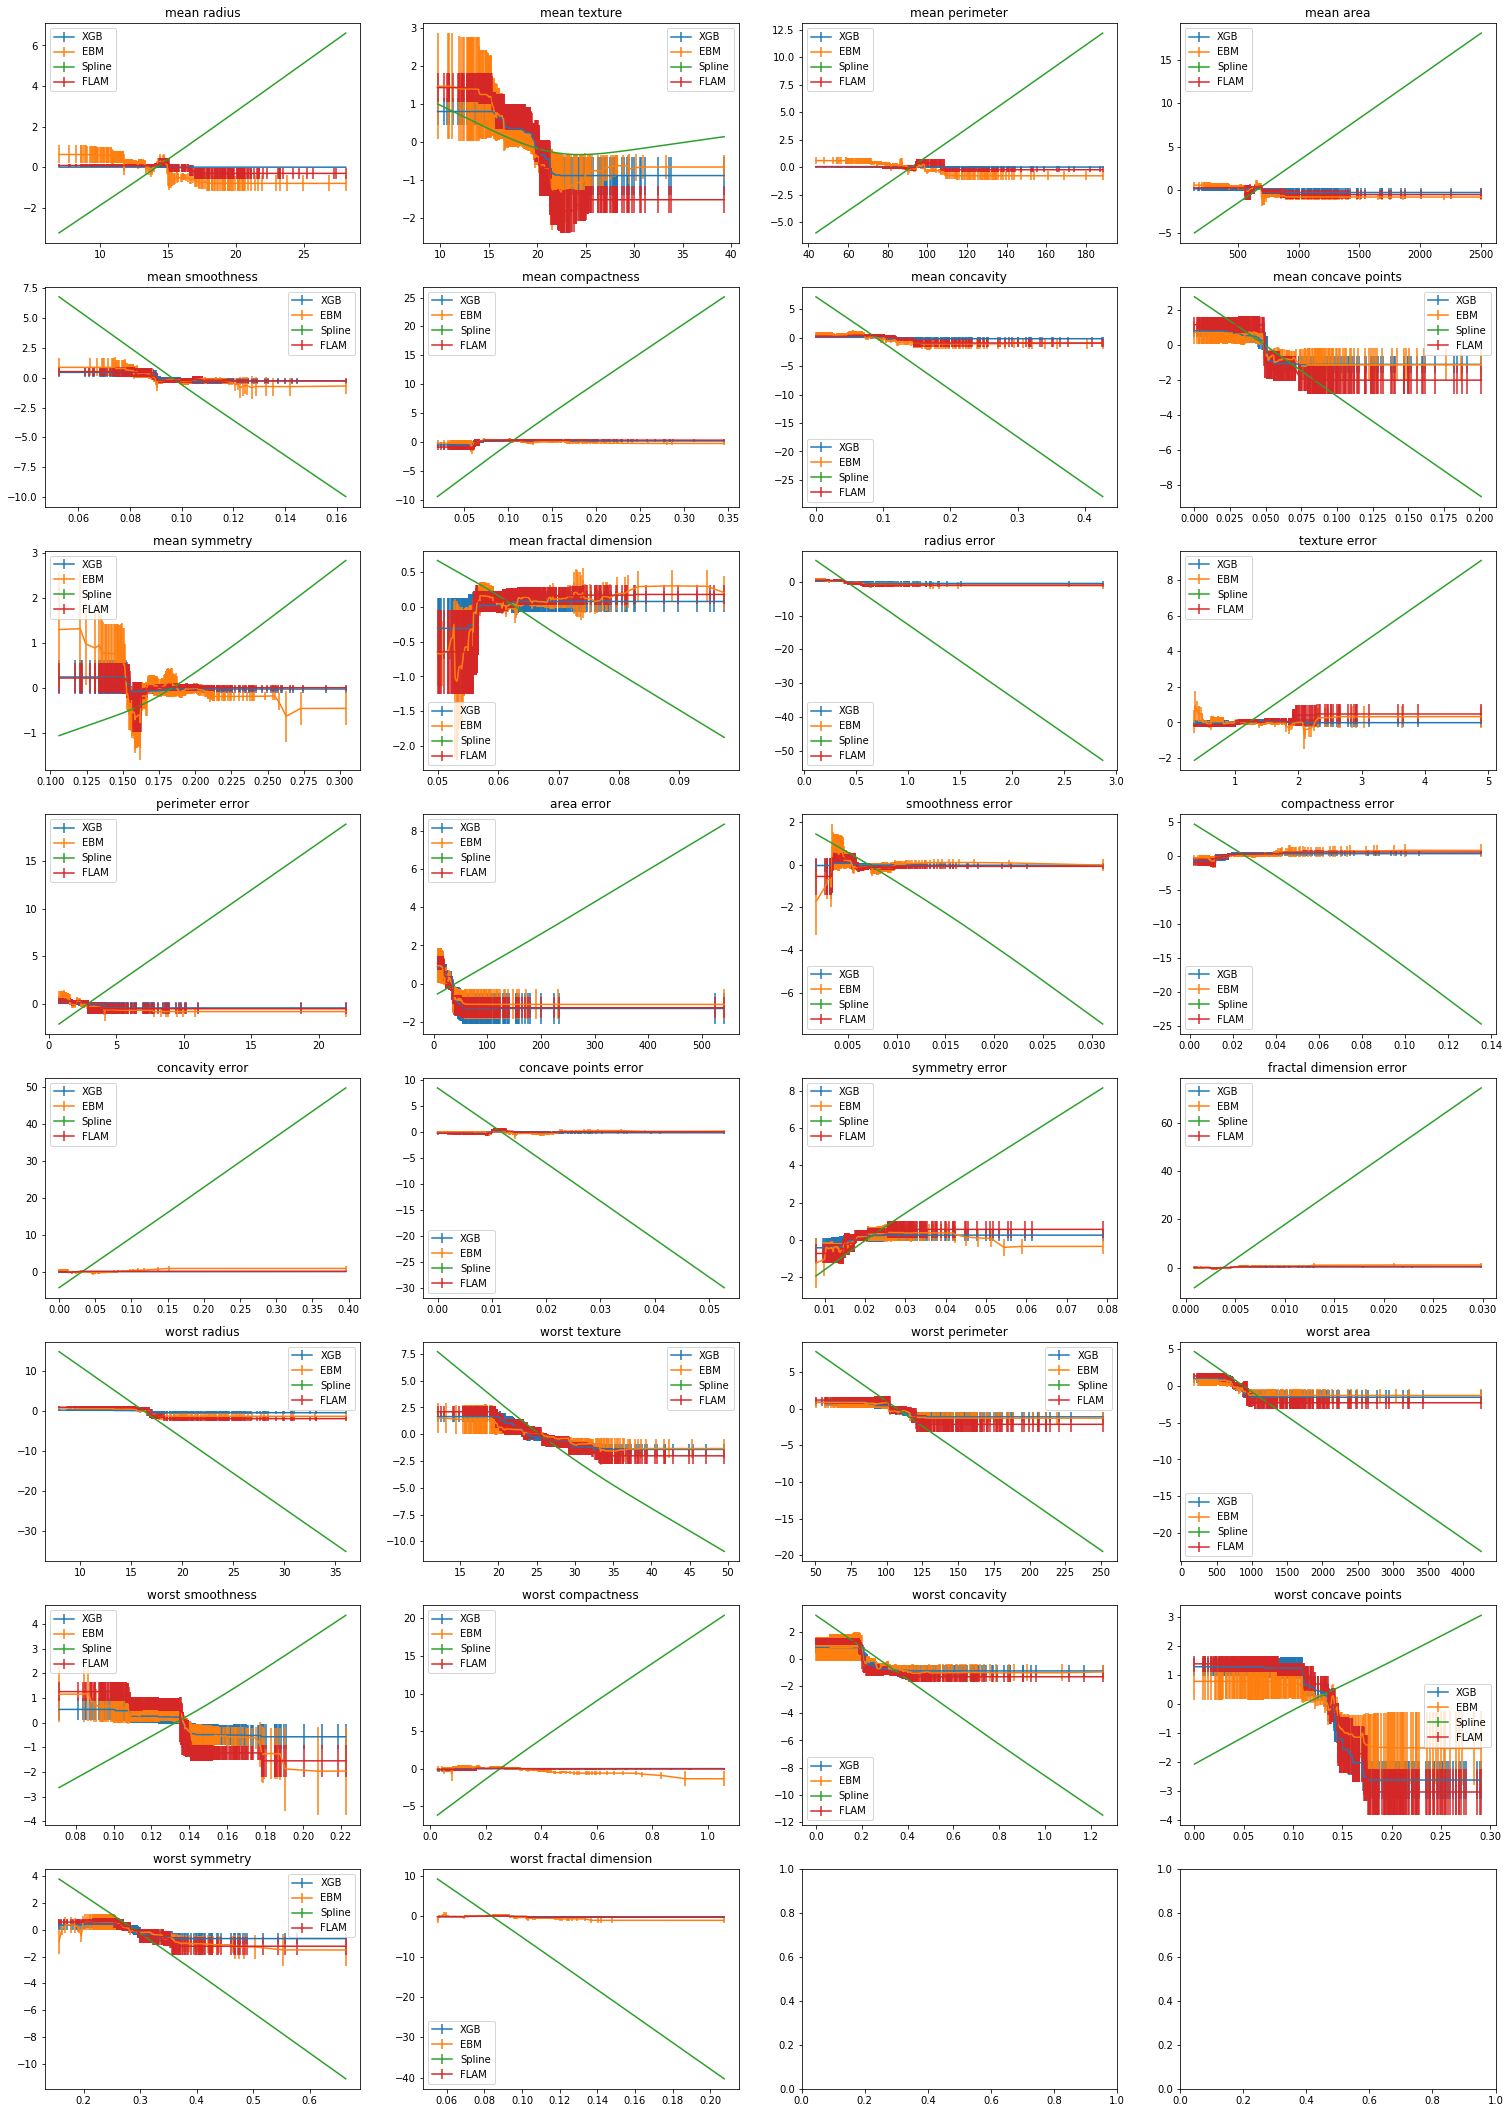

In [20]:
from vis_utils import vis_main_effects

fig, axes = vis_main_effects({
    'XGB': xgb.get_GAM_plot_dataframe(),
    'EBM': ebm.get_GAM_plot_dataframe(),
    'Spline': spline.get_GAM_plot_dataframe(),
    'FLAM': flam.get_GAM_plot_dataframe(),
#     'rspline': rspline.get_GAM_plot_dataframe(), # the graph looks crazy
#     'lr': lr.get_GAM_plot_dataframe(),
})